In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import sys

### Problem Position

In this lab, we will try to classify articles of clothing from the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. A few samples are shown below:  

<center><img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true" width="400"  /></center>


Fashion-MNIST is a dataset of article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

In [3]:
#load data
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Labels**  
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [8]:
targets_names=["T-Shirt", "Trousers", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

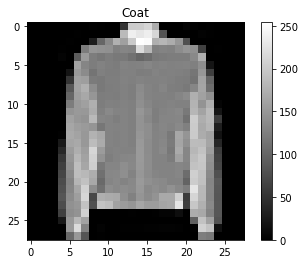

In [9]:
plt.figure()
plt.imshow(X_test[100], cmap='gray')
plt.colorbar()
plt.title(targets_names[y_test[100]])
plt.show()

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:  
**Training data — used for training the model  
Validation data — used for tuning the hyperparameters and evaluate the models  
Test data — used to test the model after the model has gone through initial vetting by the validation set.**  

In [5]:
    X_val = X_test[:8000]
    y_val = y_test[:8000]
    X_test = X_test[8000:]
    y_test = y_test[8000:]

In [6]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(60000, 28, 28)
(2000, 28, 28)
(8000, 28, 28)


### Build the Model

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


**The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer has no parameters to learn; it only reformats the data.**  

**After the pixels are flattened, the network consists of a sequence of 03 tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers:  
The first Dense layer has 256 nodes (or neurons)  
The second 128 neurons  
The 3rd 64 neurons  
The last 10 neurons returns an array with length of 10.  
Each node contains a score that indicates the current image belongs to one of the 10 classes.**    

In [11]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


### Compile The Model

In [12]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=["accuracy"])

### Train the Model

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
#validation_data : train the model on your training data and tune your hyperparameters with the results of metrics (accuracy, loss etc) that you get from your validation set.
# that's why it is important to split data into test, validation(dev) and test sets

Epoch 1/10
1875/1875 [==============================] - 31s 13ms/step - loss: 1.3366 - accuracy: 0.7765 - val_loss: 0.5595 - val_accuracy: 0.8001
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4669 - accuracy: 0.8344 - val_loss: 0.4721 - val_accuracy: 0.8411
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4259 - accuracy: 0.8476 - val_loss: 0.4854 - val_accuracy: 0.8355
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4028 - accuracy: 0.8547 - val_loss: 0.4590 - val_accuracy: 0.8432
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3801 - accuracy: 0.8635 - val_loss: 0.4348 - val_accuracy: 0.8512
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3705 - accuracy: 0.8663 - val_loss: 0.4010 - val_accuracy: 0.8596
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3533 - accuracy: 0.8734 - val_loss: 0.4421 -

In [14]:
    # evaluate metrics
    print("\nEvaluating...", flush=True)
    print('Training data:', flush=True)
    loss, acc = model.evaluate(X_train, y_train, verbose=0)
    print("  Training : loss %.3f - acc %.3f" % (loss, acc))
    print('Validation data:', flush=True)
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print("  Validation: loss %.3f - acc %.3f" % (loss, acc))
    print('Test data:', flush=True)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))


Evaluating...
Training data:
  Training : loss 0.293 - acc 0.893
Cross-validation data:
  Cross-val: loss 0.391 - acc 0.869
Test data:
  Testing  : loss 0.355 - acc 0.872


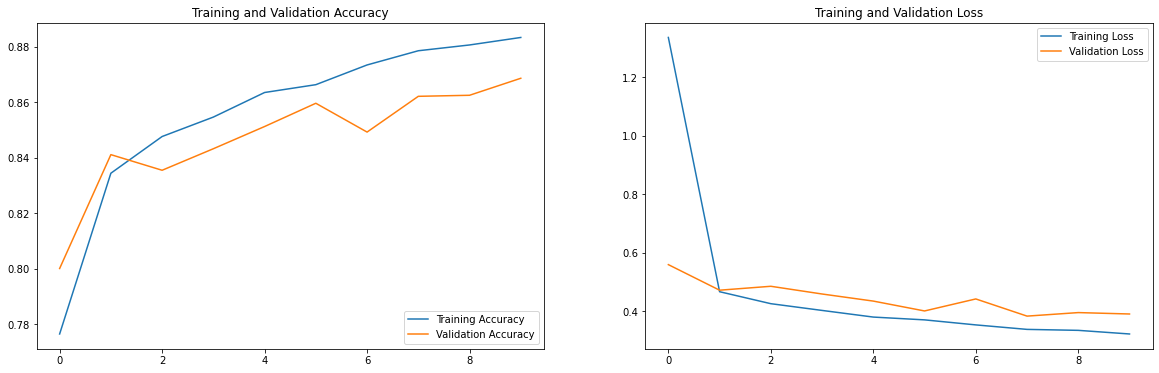

In [30]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(10)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))


Loss on the TEST Set: 0.355
Accuracy on the TEST Set: 87.150%


### Regularization

Add weight regularization

Applying L2 regularization

In [18]:
from tensorflow.keras import regularizers
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [20]:
model_l2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model_l2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 31s 13ms/step - loss: 2.1144 - accuracy: 0.7692 - val_loss: 1.0422 - val_accuracy: 0.8144
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.9287 - accuracy: 0.8260 - val_loss: 0.8438 - val_accuracy: 0.8310
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7632 - accuracy: 0.8396 - val_loss: 0.6875 - val_accuracy: 0.8459
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.6236 - accuracy: 0.8496 - val_loss: 0.6452 - val_accuracy: 0.8279
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5268 - accuracy: 0.8562 - val_loss: 0.5443 - val_accuracy: 0.8453
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4766 - accuracy: 0.8608 - val_loss: 0.4993 - val_accuracy: 0.8508
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4555 - accuracy: 0.8636 - val_loss: 0.4669 -

In [22]:
   # evaluate metrics
print("\nEvaluating...", flush=True)
print('Training data:', flush=True)
loss, acc = model_l2.evaluate(X_train, y_train, verbose=0)
print("  Training : loss %.3f - acc %.3f" % (loss, acc))
print('Validation data:', flush=True)
loss, acc = model_l2.evaluate(X_val, y_val, verbose=0)
print("  Val: loss %.3f - acc %.3f" % (loss, acc))
print('Test data:', flush=True)
loss, acc = model_l2.evaluate(X_test, y_test, verbose=0)
print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))


Evaluating...
Training data:
  Training : loss 0.399 - acc 0.879
Cross-validation data:
  Cross-val: loss 0.470 - acc 0.857
Test data:
  Testing  : loss 0.455 - acc 0.863


Dropout

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

In [24]:

model_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [25]:
model_dropout.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
model_dropout.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 30s 12ms/step - loss: 2.0671 - accuracy: 0.3873 - val_loss: 1.3366 - val_accuracy: 0.4803
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 1.2561 - accuracy: 0.5112 - val_loss: 0.9690 - val_accuracy: 0.5951
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0025 - accuracy: 0.5959 - val_loss: 0.8317 - val_accuracy: 0.6526
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8444 - accuracy: 0.6691 - val_loss: 0.7042 - val_accuracy: 0.7287
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7449 - accuracy: 0.7103 - val_loss: 0.6328 - val_accuracy: 0.7567
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6741 - accuracy: 0.7331 - val_loss: 0.6521 - val_accuracy: 0.7539
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6348 - accuracy: 0.7514 - val_loss: 0.5818 -

In [26]:
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-tr

L2+Dropout

In [28]:
model_l2Drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model_l2Drop.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
model_l2Drop.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 31s 13ms/step - loss: 1.7403 - accuracy: 0.7001 - val_loss: 1.1164 - val_accuracy: 0.7591
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.9193 - accuracy: 0.8059 - val_loss: 0.8577 - val_accuracy: 0.8092
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7262 - accuracy: 0.8334 - val_loss: 0.7633 - val_accuracy: 0.8083
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6098 - accuracy: 0.8443 - val_loss: 0.6293 - val_accuracy: 0.8223
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5310 - accuracy: 0.8523 - val_loss: 0.5769 - val_accuracy: 0.8339
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4917 - accuracy: 0.8554 - val_loss: 0.5321 - val_accuracy: 0.8428
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4672 - accuracy: 0.8589 - val_loss: 0.4947 -

EarlyStopping

**Early stopping is performed using tf.keras.callbacks. Callbacks provide a way to interact with the model while it's training and inforce some decisions automatically. Callbacks need to be instantiated and are added to the .fit() function via the callbacks argument.**

In [31]:
model_ES = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

model_ES.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stop training when there is no improvement in the validation loss for 2 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history_ES = model_ES.fit(X_train, y_train,
                    epochs = 10,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 29s 12ms/step - loss: 1.4095 - accuracy: 0.7721 - val_loss: 0.5485 - val_accuracy: 0.8114
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4752 - accuracy: 0.8320 - val_loss: 0.4625 - val_accuracy: 0.8396
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4433 - accuracy: 0.8442 - val_loss: 0.5191 - val_accuracy: 0.8251
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4117 - accuracy: 0.8528 - val_loss: 0.4665 - val_accuracy: 0.8317


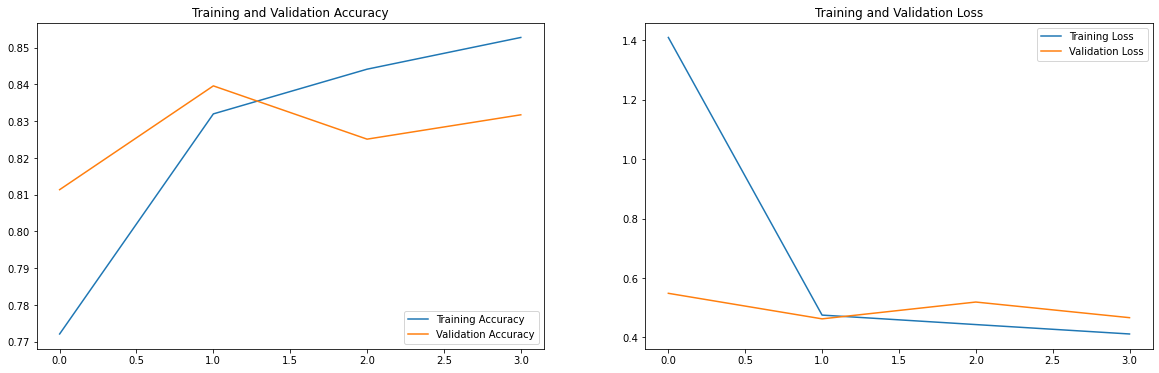

In [34]:
training_accuracy = history_ES.history['accuracy']
validation_accuracy = history_ES.history['val_accuracy']

training_loss = history_ES.history['loss']
validation_loss = history_ES.history['val_loss']

epochs_range=range(4)

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()